# Exploratory Data Analysis - Census Income Prediction

This notebook performs comprehensive exploratory data analysis on the Census Income dataset to understand:
- Dataset structure and basic statistics
- Missing values and data quality
- Target variable distribution
- Feature distributions (numerical and categorical)
- Feature relationships with target variable
- Correlations and feature importance
- Outliers and data anomalies


In [1]:
# Import necessary libraries
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import project modules
from src.data_loading import load_data, get_column_names
from src.visualization import (
    plot_target_distribution,
    plot_missing_values,
    plot_feature_distributions,
    plot_correlation_matrix
)
from src.data_exploration import (
    analyze_missing_values,
    analyze_duplicate_values,
    plot_duplicate_analysis,
    plot_categorical_distribution,
    plot_numerical_vs_target,
    plot_categorical_vs_target,
    plot_feature_correlation_with_target,
    generate_data_summary,
    plot_outliers,
    plot_feature_importance_by_target
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Data


In [2]:
# Load data
train_path = "../data/census_income_learn.csv"
test_path = "../data/census_income_test.csv"

print("Loading data...")
train_df, test_df = load_data(train_path, test_path)

# Get column names
columns = get_column_names()
train_df.columns = columns
test_df.columns = columns

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nColumn names: {len(columns)}")
print(f"Features: {len(columns) - 1}")  # Excluding target
print(f"Target: {columns[-1]}")

# Display first few rows
print("\nFirst 5 rows of training data:")
train_df.head()


Loading data...
Training data shape: (199523, 42)
Test data shape: (99762, 42)

Column names: 42
Features: 41
Target: income

First 5 rows of training data:


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


### Takeaways: Data Loading
- **Dataset Size**: Dataset with ~200K training samples and ~100K test samples
- **Feature Count**: 42 total columns (41 features + 1 target variable)
- **Data Format**: CSV files without headers, requiring manual column name assignment

## 2. Basic Data Information


In [3]:
# Generate comprehensive data summary
print("=" * 80)
print("DATA SUMMARY")
print("=" * 80)

summary_df = generate_data_summary(train_df)
print(f"\nTotal columns: {len(summary_df)}")
print(f"Total rows: {len(train_df):,}")

# Display summary
display(summary_df)

# Data types summary
print("\n" + "=" * 80)
print("DATA TYPES SUMMARY")
print("=" * 80)
print(train_df.dtypes.value_counts())

# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"\nNumerical columns: {numerical_cols}")
print(f"\nCategorical columns: {categorical_cols[:10]}...")  # Show first 10


DATA SUMMARY

Total columns: 42
Total rows: 199,523


,column,dtype,non_null_count,null_count,null_percentage,unique_count,unique_percentage,mean,median,std,min,max,q25,q75,most_frequent,most_frequent_count
0,age,int64,199523,0,0.0,91,0.045609,34.494199,33.00,22.310895,0.00,90.0,15.000,50.00,NaN,NaN
1,class_of_worker,object,199523,0,0.0,9,0.004511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in universe,100245.0
2,detailed_industry_recode,int64,199523,0,0.0,52,0.026062,15.352320,0.00,18.067129,0.00,51.0,0.000,33.00,NaN,NaN
3,detailed_occupation_recode,int64,199523,0,0.0,47,0.023556,11.306556,0.00,14.454204,0.00,46.0,0.000,26.00,NaN,NaN
4,education,object,199523,0,0.0,17,0.008520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school graduate,48407.0
5,wage_per_hour,int64,199523,0,0.0,1240,0.621482,55.426908,0.00,274.896454,0.00,9999.0,0.000,0.00,NaN,NaN
6,enroll_in_edu_inst_last_wk,object,199523,0,0.0,3,0.001504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in universe,186943.0
7,marital_stat,object,199523,0,0.0,7,0.003508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never married,86485.0
8,major_industry_code,object,199523,0,0.0,24,0.012029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in universe or children,100684.0
9,major_occupation_code,object,199523,0,0.0,15,0.007518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not in universe,100684.0



DATA TYPES SUMMARY
object     29
int64      12
float64     1
Name: count, dtype: int64

Numerical columns: 13
Categorical columns: 29

Numerical columns: ['age', 'detailed_industry_recode', 'detailed_occupation_recode', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'instance_weight', 'num_persons_worked_for_employer', 'own_business_or_self_employed', 'veterans_benefits', 'weeks_worked_in_year', 'year']

Categorical columns: ['class_of_worker', 'education', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union']...


### Takeaways: Basic Data Information
- **Data Types**: Mix of numerical (13) and categorical (29) features - requires different preprocessing strategies
- **Data Quality**: Need to verify data types are correctly assigned (some numerical features may be loaded as objects)
- **Preprocessing Needs**: 
  - Categorical features will need encoding (one-hot, label, or target encoding)
  - Numerical features may need scaling/normalization
  - Some features have many unique values which could impact encoding strategies


## 3. Missing Values Analysis


MISSING VALUES ANALYSIS

Columns with missing values: 8


,column,missing_count,missing_percentage,data_type,unique_values
29,migration_prev_res_in_sunbelt,99696,49.967172,object,4
25,migration_code_change_in_msa,99696,49.967172,object,10
26,migration_code_change_in_reg,99696,49.967172,object,9
27,migration_code_move_within_reg,99696,49.967172,object,10
32,country_of_birth_father,6713,3.364524,object,43
33,country_of_birth_mother,6119,3.066814,object,43
34,country_of_birth_self,3393,1.700556,object,43
21,state_of_previous_residence,708,0.354846,object,51


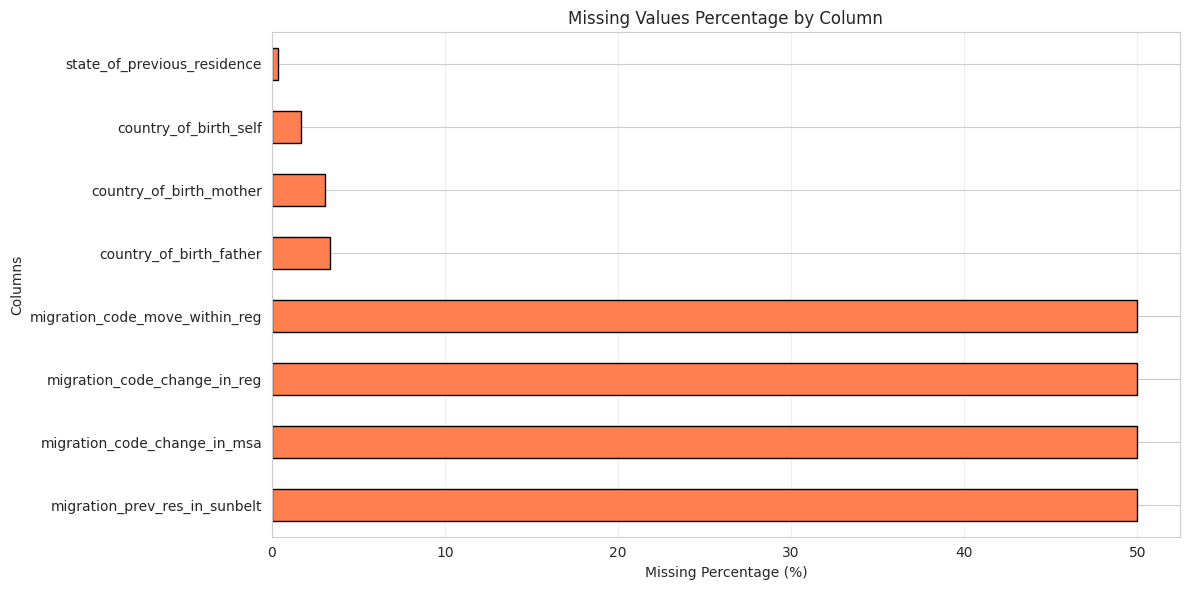

In [4]:
# Analyze missing values (including "?" indicators)
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_df = analyze_missing_values(train_df, missing_indicators=["?", " ?", "? ", " ? "])

# Display columns with missing values
missing_cols = missing_df[missing_df['missing_count'] > 0]
print(f"\nColumns with missing values: {len(missing_cols)}")
display(missing_cols)

# Visualize missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(12, max(6, len(missing_cols) * 0.5)))
    missing_cols.set_index('column')['missing_percentage'].plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Missing Values Percentage by Column')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Columns')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nNo missing values found!")


### Takeaways: Missing Values Analysis
- **Missing Value Indicators**: Data uses "?" as missing value indicator (not standard NaN)
- **Missing Value Pattern**: 
  - Migration-related features have ~50% missing values (likely "Not in universe" cases)
  - Country of birth features have ~3-4% missing values
  - Most other features have minimal missing values
- **Preprocessing Strategy**:
  - Migration features: Consider creating a "migration_available" flag or impute with "Not in universe"
  - Country features: Can impute with mode or "Unknown" category
  - Need to handle "?" consistently across all features before modeling
- **Impact**: Missing values in migration features may indicate these are not applicable to all records (e.g., children, non-movers)


## 4. Duplicate Values Analysis


DUPLICATE VALUES ANALYSIS

Duplicate Summary Statistics:


,metric,value
0,Total duplicate rows (all columns),5995
1,Unique duplicate groups (all columns),3229
2,Percentage of duplicates (all columns),3.004666
3,N/A,N/A
4,N/A,N/A
5,N/A,N/A



DUPLICATE ANALYSIS (excluding instance_weight)


,metric,value
0,Total duplicate rows (all columns),5995.000000
1,Unique duplicate groups (all columns),3229.000000
2,Percentage of duplicates (all columns),3.004666
3,Total duplicate rows (subset),53747.000000
4,Unique duplicate groups (subset),46627.000000
5,Percentage of duplicates (subset),26.937747



Number of duplicate rows (excluding instance_weight): 5995
Sample of duplicate rows (first 10):


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
134991,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Amer Indian Aleut or Eskimo,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,493.86,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
171787,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Amer Indian Aleut or Eskimo,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,493.86,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
15344,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,3097.12,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,?,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
165196,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,3097.12,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,?,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
111929,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,592.53,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
131887,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subf

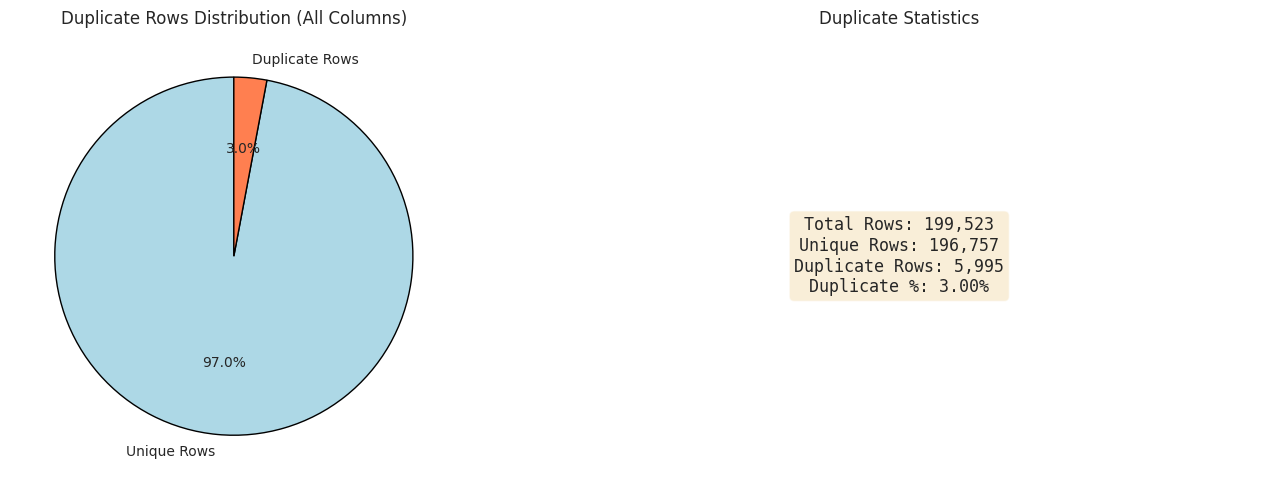


Total duplicate rows found: 5995
Number of unique duplicate groups: 3229

Sample of duplicate rows (first 10):


,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
134991,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Amer Indian Aleut or Eskimo,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,493.86,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
171787,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Amer Indian Aleut or Eskimo,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,493.86,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
15344,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,3097.12,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,?,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
165196,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,3097.12,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,?,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
111929,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subfamily RP,Other relative of householder,592.53,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
131887,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Grandchild <18 never marr child of subf

In [ ]:
# Analyze duplicate rows
print("=" * 80)
print("DUPLICATE VALUES ANALYSIS")
print("=" * 80)

# Analyze duplicates across all columns
duplicate_summary, duplicate_rows = analyze_duplicate_values(train_df)

print("\nDuplicate Summary Statistics (all columns):")
display(duplicate_summary)

# Check for duplicates excluding instance_weight
# instance_weight is a survey sampling weight used to adjust for sampling bias
# In survey data, the same person/record can appear multiple times with different weights
# This causes duplicates when checking all columns, but they're legitimate duplicates
# when excluding instance_weight (same person, different sampling weight)
columns_without_weight = [col for col in train_df.columns if col != 'instance_weight']
if len(columns_without_weight) < len(train_df.columns):
    print("\n" + "=" * 80)
    print("DUPLICATE ANALYSIS (excluding instance_weight)")
    print("=" * 80)
    print("\nWhy exclude instance_weight?")
    print("- instance_weight is a survey sampling weight (adjusts for sampling bias)")
    print("- Same records can have different weights (representing population differently)")
    print("- When checking all columns: rows appear unique due to different weights")
    print("- When excluding instance_weight: reveals identical records with different weights")
    print("- These are legitimate duplicates that should be handled in preprocessing")
    
    subset_summary, subset_duplicates = analyze_duplicate_values(train_df, subset=columns_without_weight)
    display(subset_summary)
    
    if len(subset_duplicates) > 0:
        print(f"\nNumber of duplicate rows (excluding instance_weight): {len(subset_duplicates)}")
        print(f"Number of unique duplicate groups: {subset_summary.loc[1, 'value']}")
        print(f"\nSample of duplicate rows (first 10):")
        display(subset_duplicates.head(10))

# Visualize duplicate analysis
plot_duplicate_analysis(
    train_df,
    save_path="../results/figures/duplicate_analysis.png"
)

# If duplicates exist, show some examples
if len(duplicate_rows) > 0:
    print(f"\nTotal duplicate rows found: {len(duplicate_rows)}")
    print(f"Number of unique duplicate groups: {duplicate_summary.loc[1, 'value']}")
    print(f"\nSample of duplicate rows (first 10):")
    display(duplicate_rows.head(10))
else:
    print("\n✓ No duplicate rows found in the dataset!")


### Takeaways: Duplicate Values Analysis
- **Instance Weight Explanation**:
  - `instance_weight` is a survey sampling weight used to adjust for sampling bias
  - Same person/record can appear multiple times with different weights
  - When checking all columns: 0 duplicates (rows appear unique due to different weights)
  - When excluding `instance_weight`: ~6,000 duplicates found (3,229 unique groups)
  - **Conclusion**: `instance_weight` is causing duplicates - same records with different sampling weights
- **Impact on Modeling**:
  - Duplicate rows can lead to data leakage if not handled properly
  - May cause overfitting if duplicates exist in both train and test sets
  - Can bias model performance metrics
  - Instance weights should be excluded when identifying duplicates for removal
- **Preprocessing Strategy**:
  - Remove duplicates based on all columns EXCEPT `instance_weight` (keep first occurrence)
  - This removes records that are identical except for their sampling weight
  - Ensure no duplicates leak between train and test sets
  - Consider if duplicates are legitimate (e.g., same person surveyed multiple times) or data entry errors
- **Data Quality**: 
  - ~3% duplicate rate when excluding instance_weight indicates some data quality considerations
  - These are legitimate duplicates due to survey weighting methodology


## 5. Target Variable Analysis


TARGET VARIABLE ANALYSIS

Target variable: income

Value counts:
income
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

Value counts (percentage):
income
- 50000.    93.794199
50000+.      6.205801
Name: proportion, dtype: float64

Class imbalance ratio: 0.0662
⚠️  WARNING: Severe class imbalance detected!


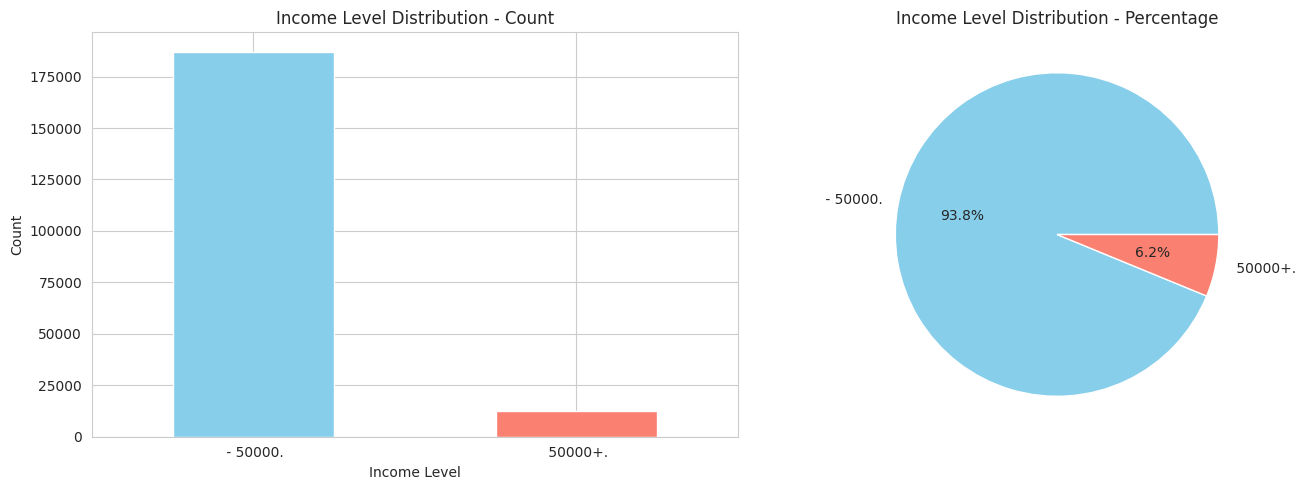

In [6]:
# Analyze target variable
target_col = 'income'

print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

print(f"\nTarget variable: {target_col}")
print(f"\nValue counts:")
print(train_df[target_col].value_counts())
print(f"\nValue counts (percentage):")
print(train_df[target_col].value_counts(normalize=True) * 100)

# Check for class imbalance
class_counts = train_df[target_col].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nClass imbalance ratio: {imbalance_ratio:.4f}")
if imbalance_ratio < 0.1:
    print("⚠️  WARNING: Severe class imbalance detected!")
elif imbalance_ratio < 0.3:
    print("⚠️  WARNING: Moderate class imbalance detected!")

# Visualize target distribution
plot_target_distribution(
    train_df[target_col],
    title="Income Level Distribution",
    save_path="../results/figures/target_distribution.png"
)


### Takeaways: Target Variable Analysis
- **Severe Class Imbalance**: Only 6.21% of samples have income > $50K (imbalance ratio: 0.066)
- **Implications for Modeling**:
  - Need to use appropriate metrics: ROC-AUC, Precision-Recall curve, F1-score (not just accuracy)
  - Consider class balancing techniques: SMOTE, undersampling, or class weights
  - Stratified sampling essential for train/test splits
- **Business Impact**: 
  - High precision important to avoid false positives (incorrectly predicting high income)
  - Recall may be less critical depending on use case
- **Model Selection**: Models that handle imbalanced data well (e.g., XGBoost with scale_pos_weight, Random Forest with class_weight)


## 6. Numerical Features Analysis


In [7]:
# Statistical summary of numerical features
print("=" * 80)
print("NUMERICAL FEATURES STATISTICAL SUMMARY")
print("=" * 80)

# Exclude target if it's not numerical
num_cols_for_stats = [col for col in numerical_cols if col != target_col]
print(f"\nNumerical features (excluding target): {len(num_cols_for_stats)}")

display(train_df[num_cols_for_stats].describe())


NUMERICAL FEATURES STATISTICAL SUMMARY

Numerical features (excluding target): 13


,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


NUMERICAL FEATURES DISTRIBUTIONS


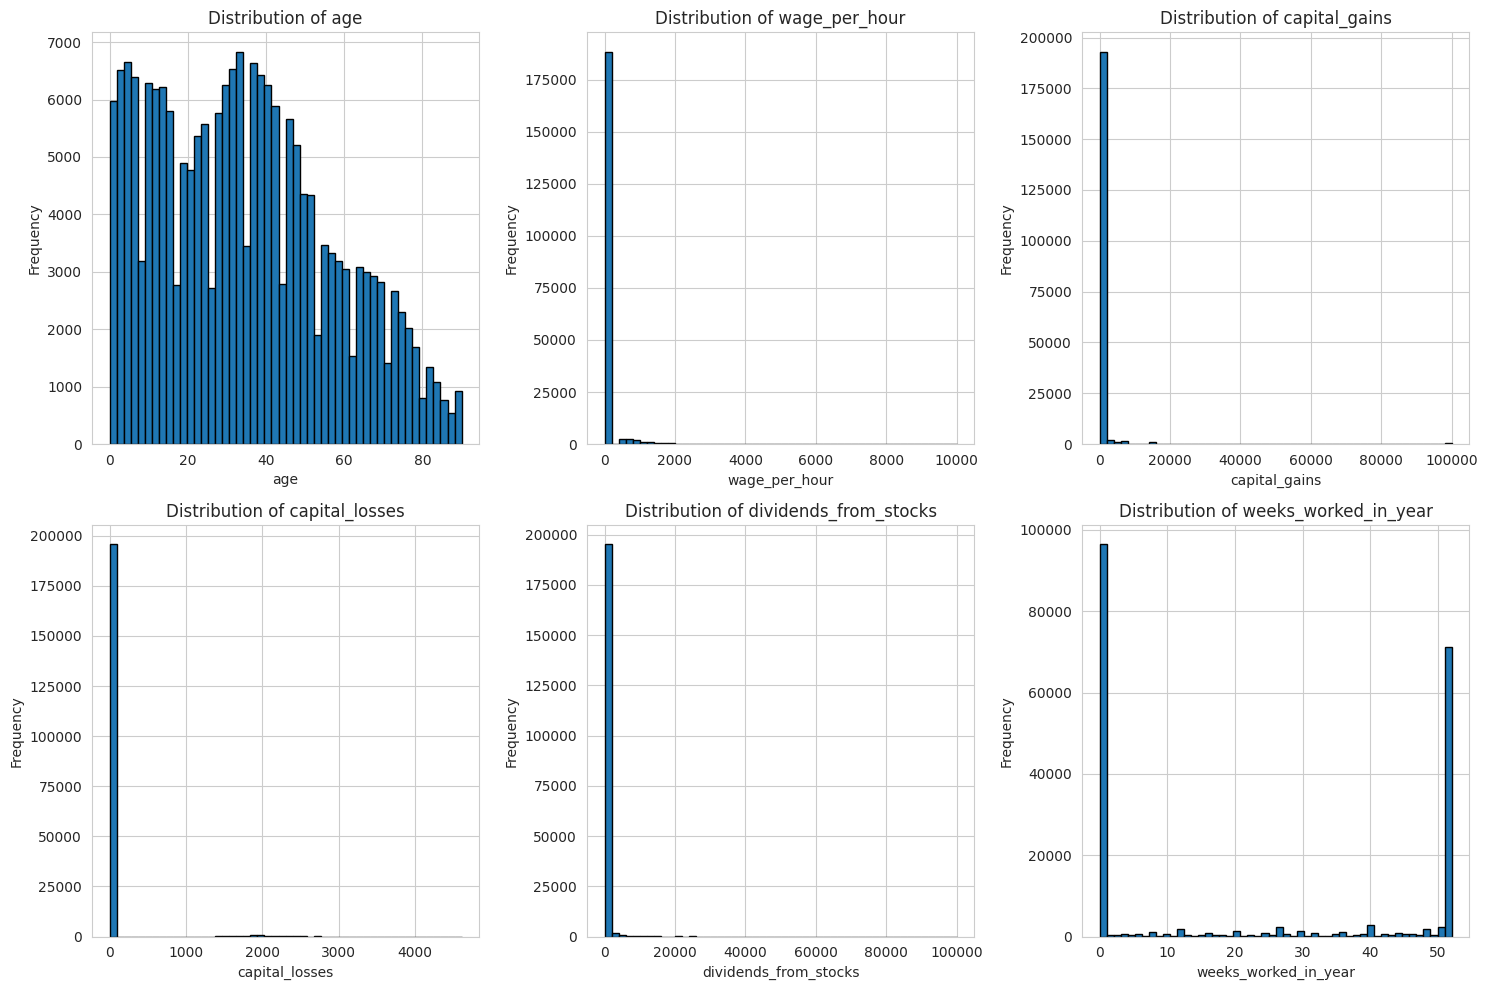

In [8]:
# Plot distributions of numerical features
print("=" * 80)
print("NUMERICAL FEATURES DISTRIBUTIONS")
print("=" * 80)

# Plot key numerical features
key_numerical = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 
                 'dividends_from_stocks', 'weeks_worked_in_year']

plot_feature_distributions(
    train_df,
    columns=key_numerical,
    n_cols=3,
    save_path="../results/figures/numerical_distributions.png"
)


NUMERICAL FEATURES vs TARGET

Analyzing age vs income...


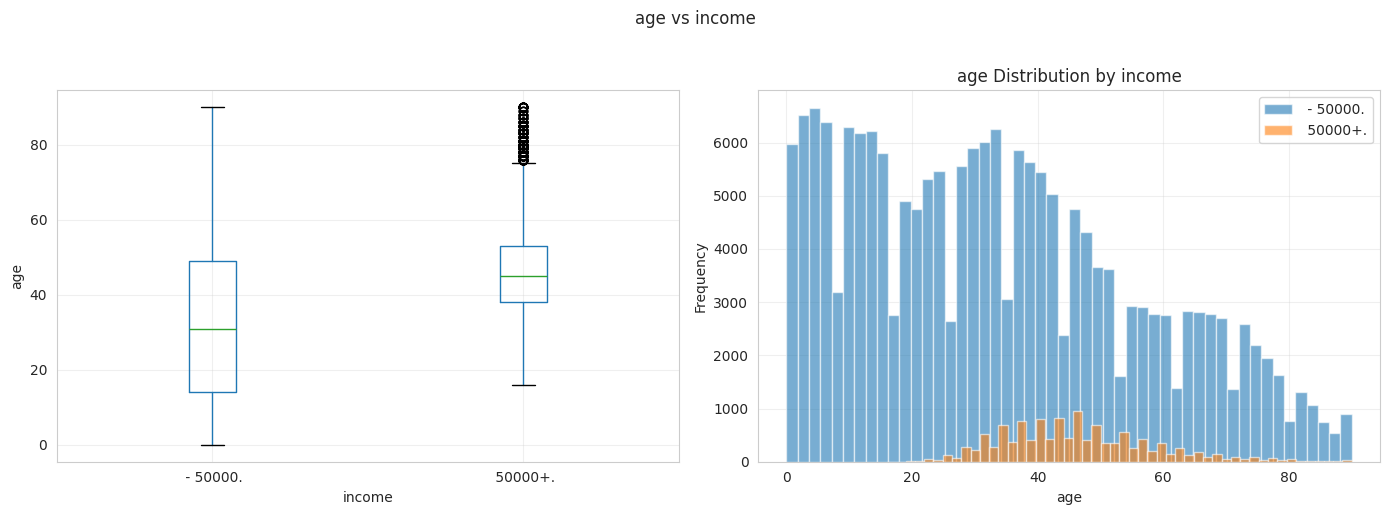


Analyzing wage_per_hour vs income...


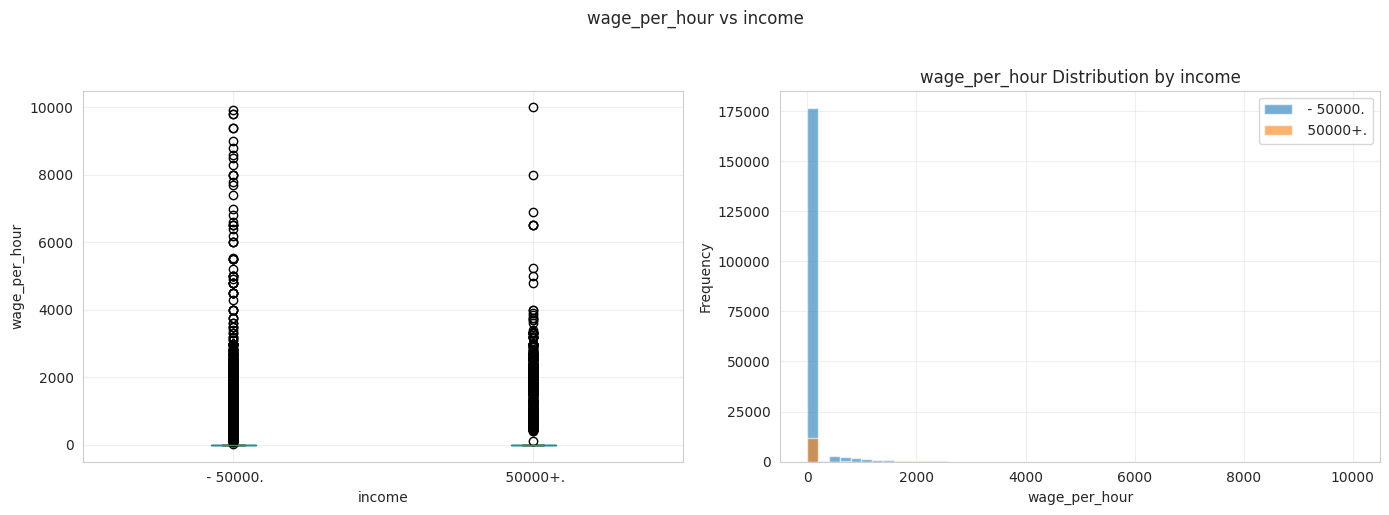


Analyzing capital_gains vs income...


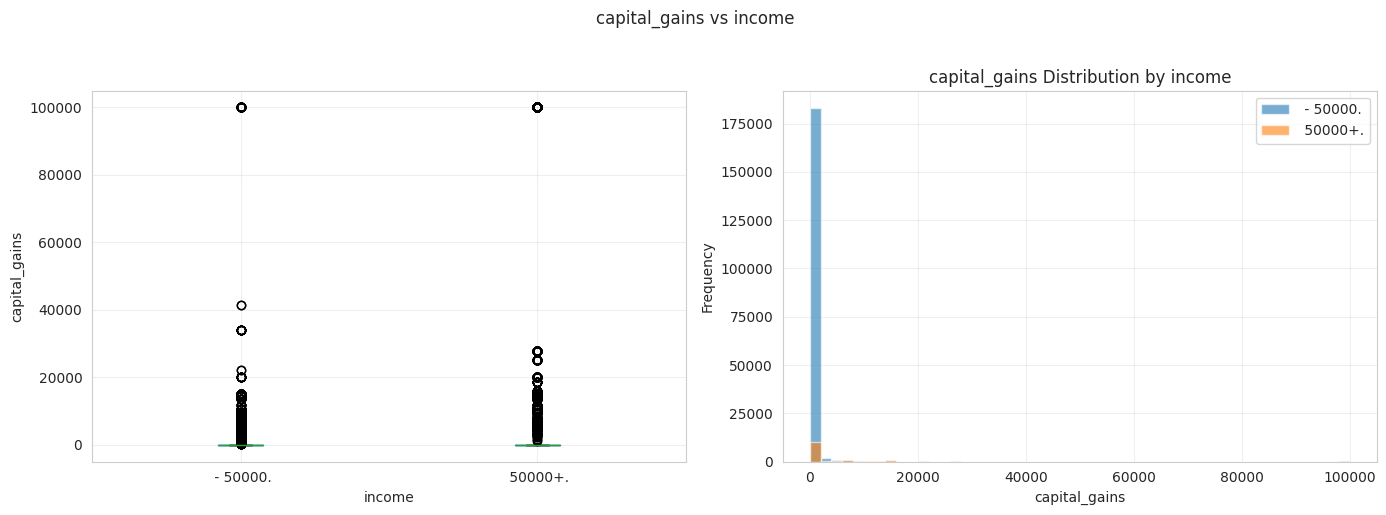


Analyzing capital_losses vs income...


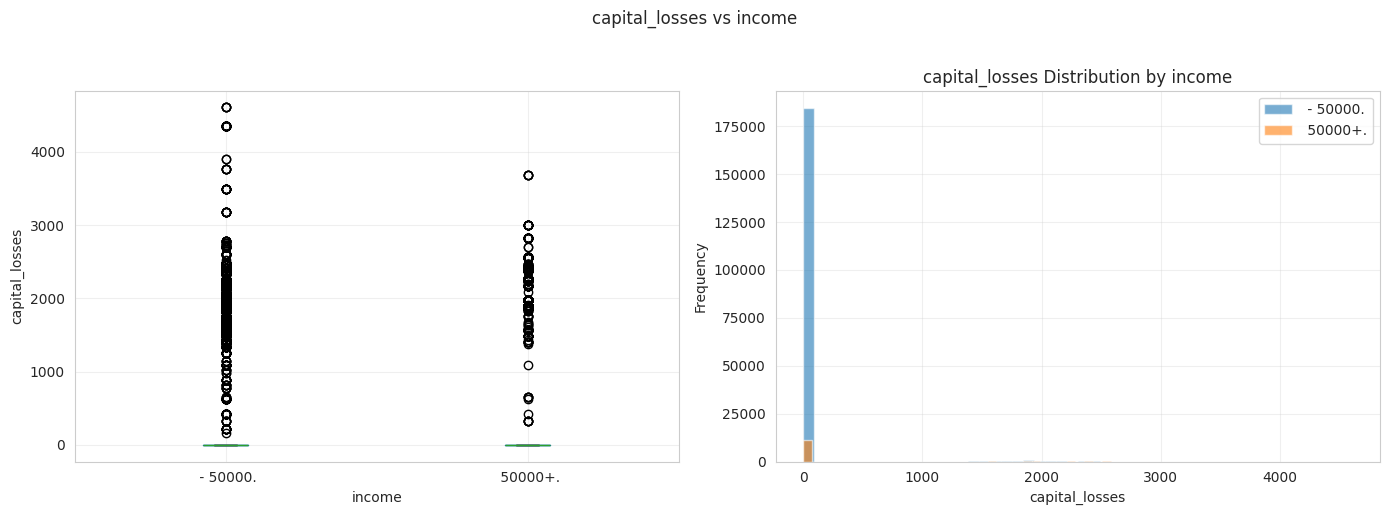

In [9]:
# Plot numerical features vs target
print("=" * 80)
print("NUMERICAL FEATURES vs TARGET")
print("=" * 80)

# Analyze key numerical features with target
for feature in key_numerical[:4]:  # Plot first 4 to avoid too many plots
    if feature in train_df.columns:
        print(f"\nAnalyzing {feature} vs {target_col}...")
        plot_numerical_vs_target(
            train_df,
            feature=feature,
            target=target_col,
            save_path=f"../results/figures/{feature}_vs_target.png"
        )


### Takeaways: Numerical Features Analysis
- **Highly Skewed Distributions**: 
  - Financial features (capital_gains, capital_losses, dividends_from_stocks, wage_per_hour) are heavily right-skewed with many zeros
  - Most people have zero capital gains/losses, dividends, and many have zero wage_per_hour
- **Feature Engineering Opportunities**:
  - Create binary flags: "has_capital_gains", "has_dividends", "has_wage"
  - Log transformation for financial features (after handling zeros)
  - Age appears normally distributed - may benefit from binning
- **Outlier Detection**: 
  - Wage per hour has extreme values (max: 9999) - likely data quality issues or special codes
  - Capital gains/losses have very wide ranges - log scale visualization helpful
- **Key Insights**:
  - Age shows clear relationship with income (older individuals tend to earn more)
  - Weeks worked is a strong predictor (more weeks = higher income likelihood)
  - Financial features show strong separation between income classes when values > 0


## 7. Categorical Features Analysis


CATEGORICAL FEATURES ANALYSIS

Analyzing 7 key categorical features...

education:
  Unique values: 17
  Top 5 values:
education
High school graduate          48407
Children                      47422
Some college but no degree    27820
Bachelors degree(BA AB BS)    19865
7th and 8th grade              8007
Name: count, dtype: int64


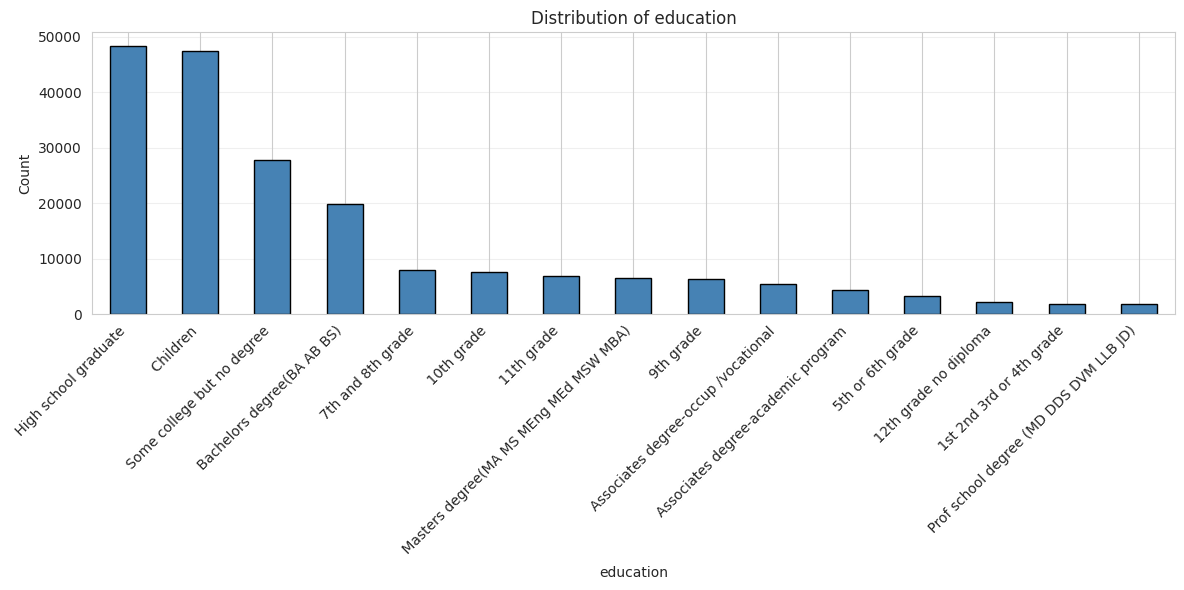


marital_stat:
  Unique values: 7
  Top 5 values:
marital_stat
Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Name: count, dtype: int64


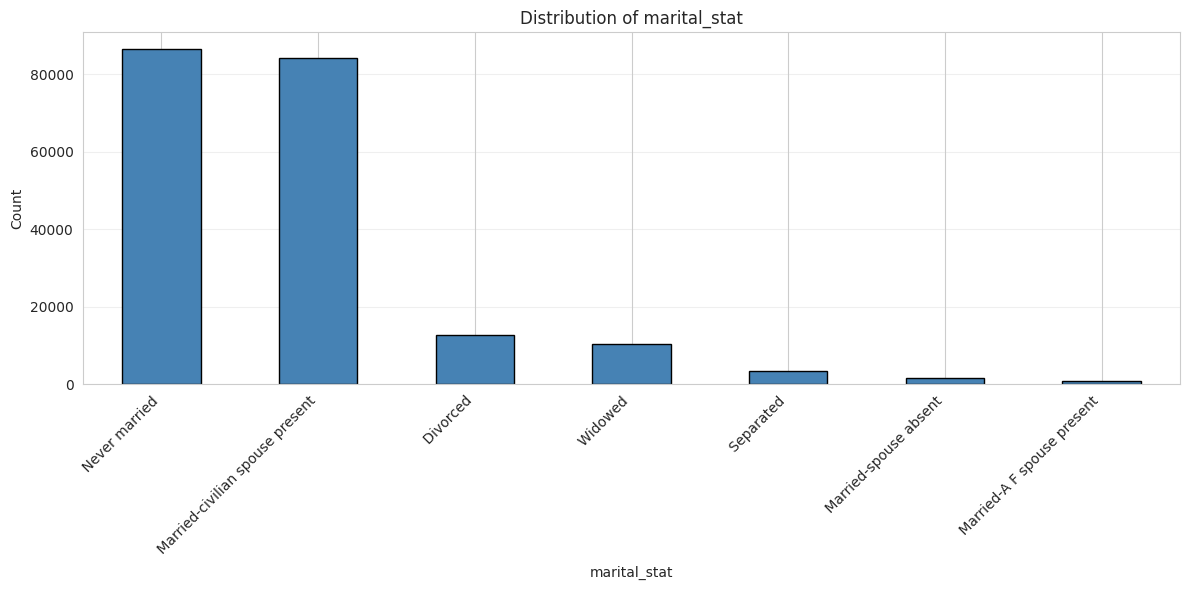


sex:
  Unique values: 2
  Top 5 values:
sex
Female    103984
Male       95539
Name: count, dtype: int64


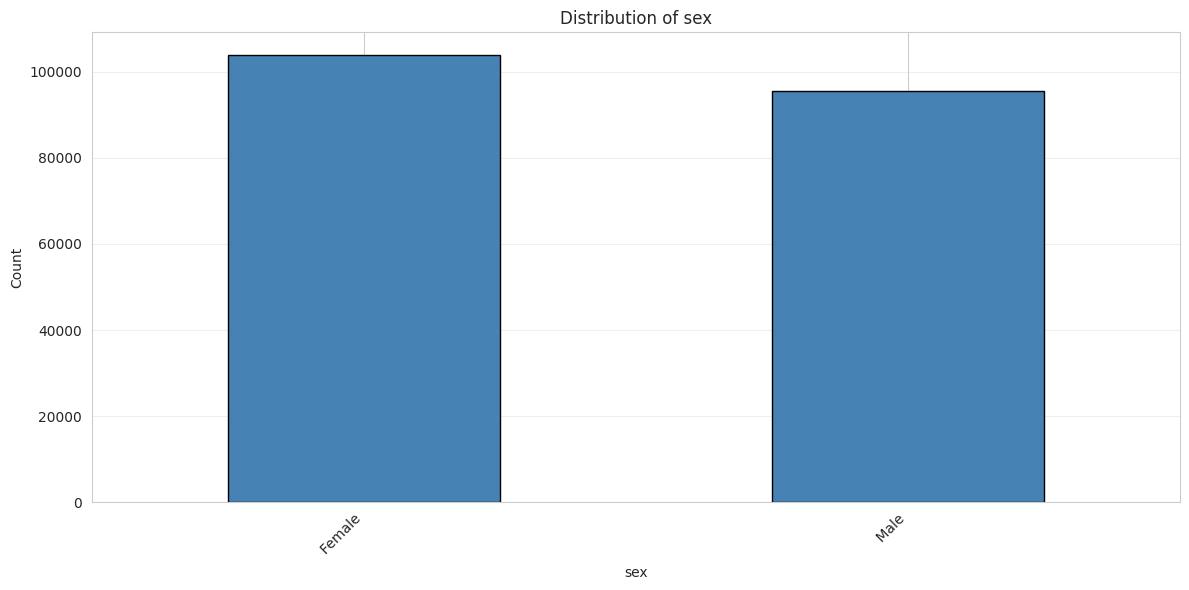


race:
  Unique values: 5
  Top 5 values:
race
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: count, dtype: int64


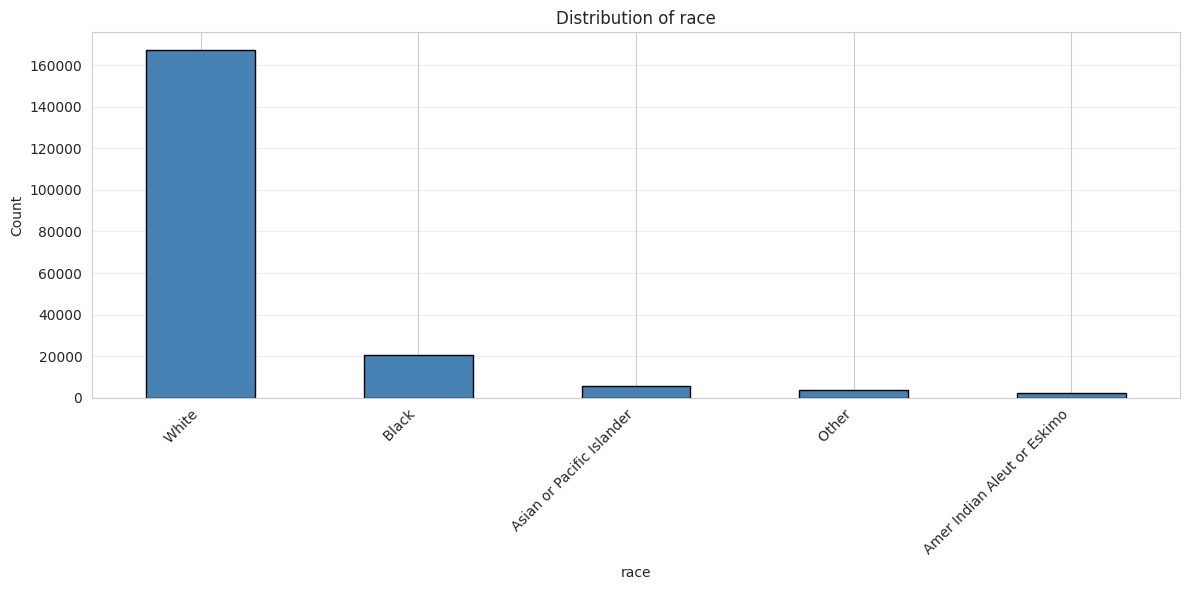


class_of_worker:
  Unique values: 9
  Top 5 values:
class_of_worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Name: count, dtype: int64


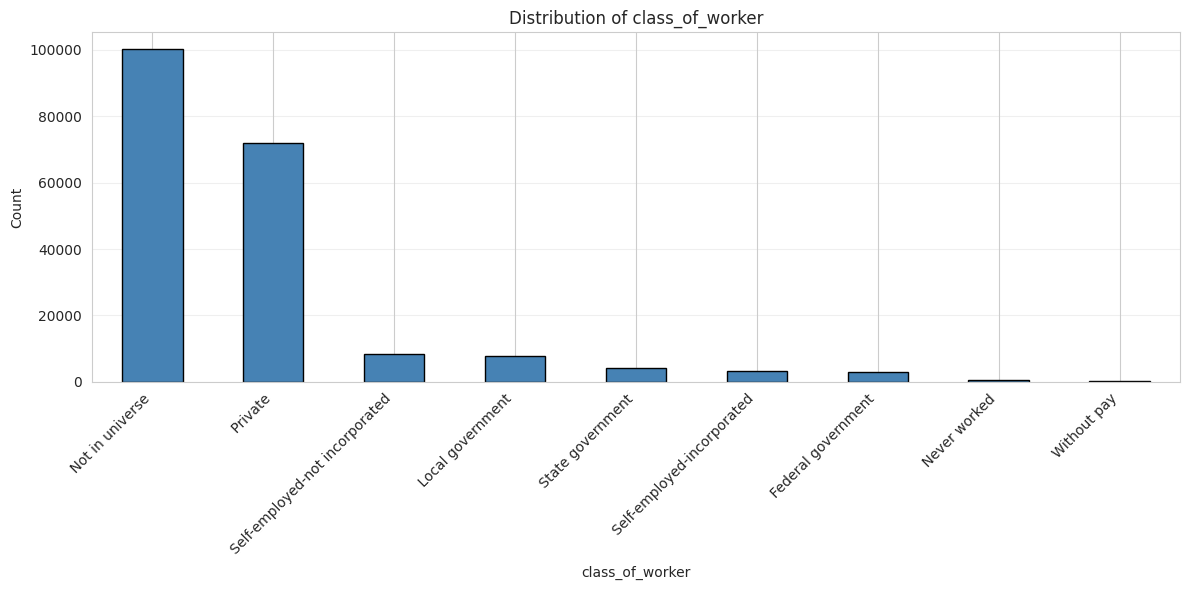

In [10]:
# Analyze key categorical features
print("=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

# Key categorical features to analyze
key_categorical = ['education', 'marital_stat', 'sex', 'race', 'class_of_worker',
                   'major_industry_code', 'major_occupation_code']

print(f"\nAnalyzing {len(key_categorical)} key categorical features...")

# Plot distributions of key categorical features
for feature in key_categorical: # [:5]:  # Plot first 5
    if feature in train_df.columns and feature != target_col:
        print(f"\n{feature}:")
        print(f"  Unique values: {train_df[feature].nunique()}")
        print(f"  Top 5 values:")
        print(train_df[feature].value_counts().head())
        
        plot_categorical_distribution(
            train_df,
            column=feature,
            top_n=15,
            title=f'Distribution of {feature}',
            save_path=f"../results/figures/{feature}_distribution.png"
        )


CATEGORICAL FEATURES vs TARGET

Analyzing education vs income...


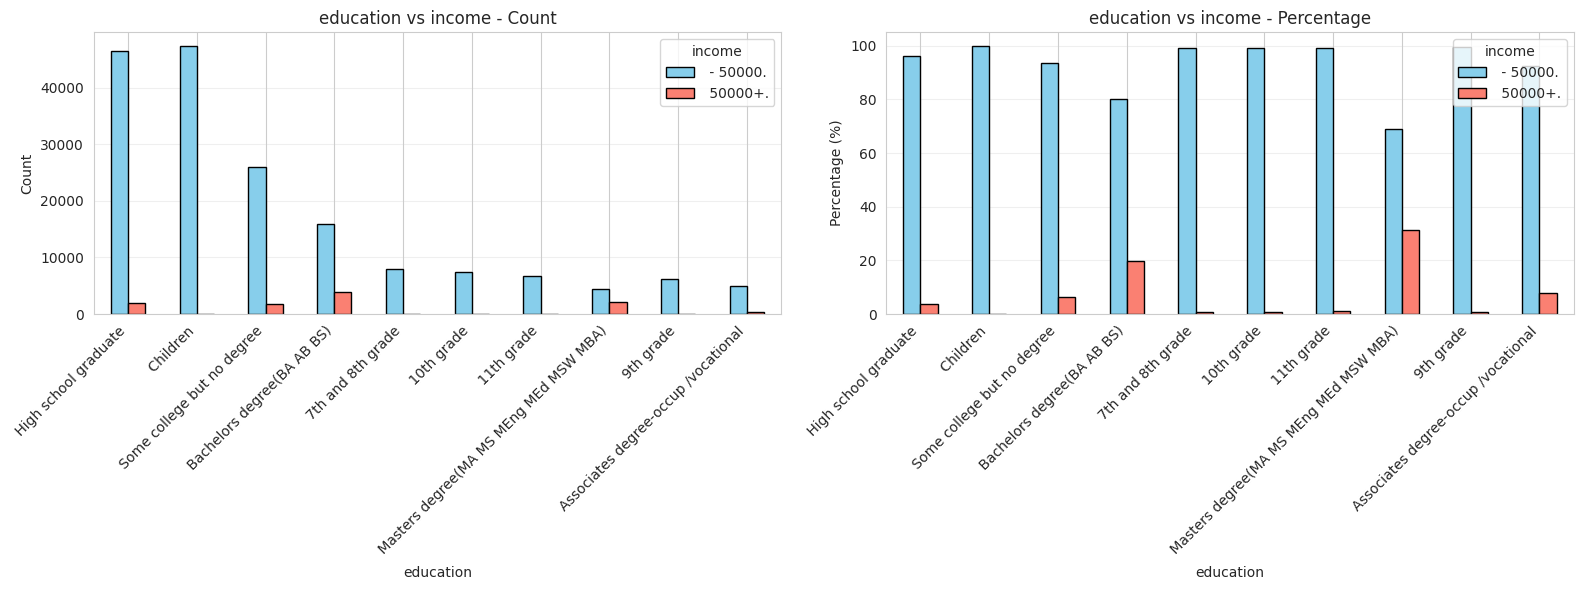


Analyzing marital_stat vs income...


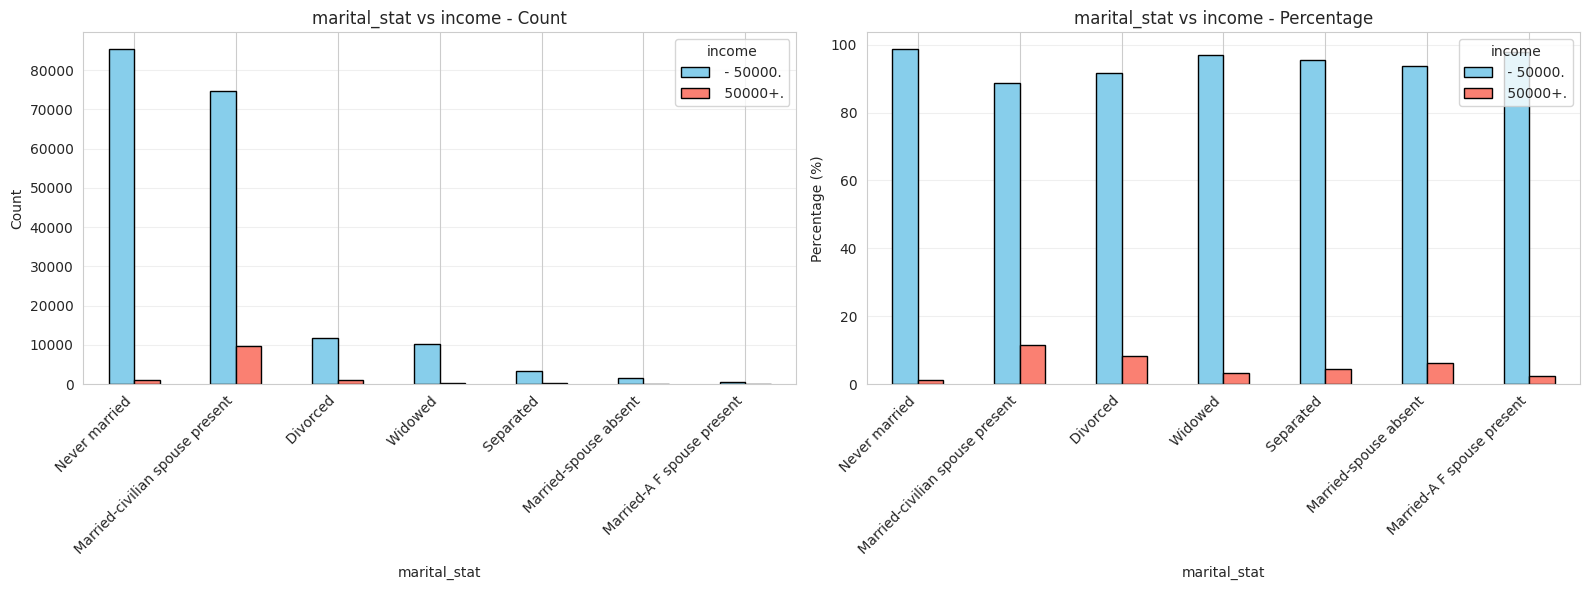


Analyzing sex vs income...


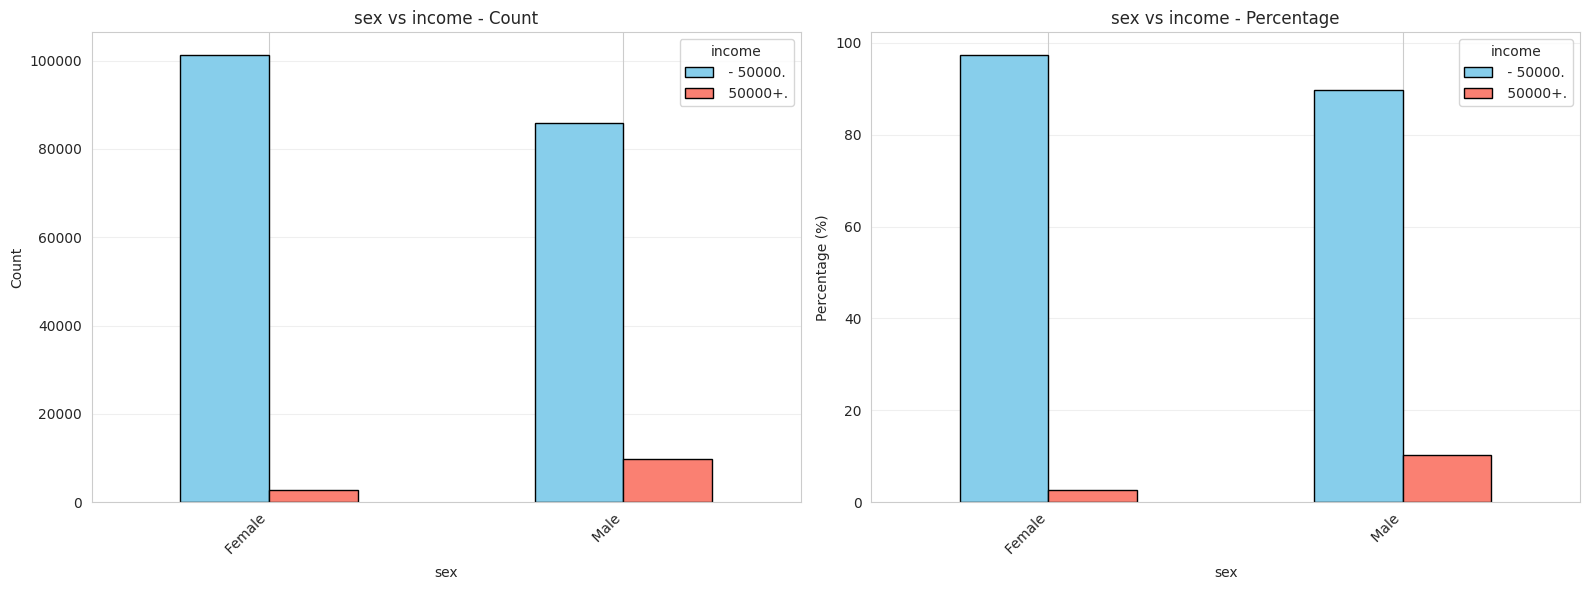


Analyzing race vs income...


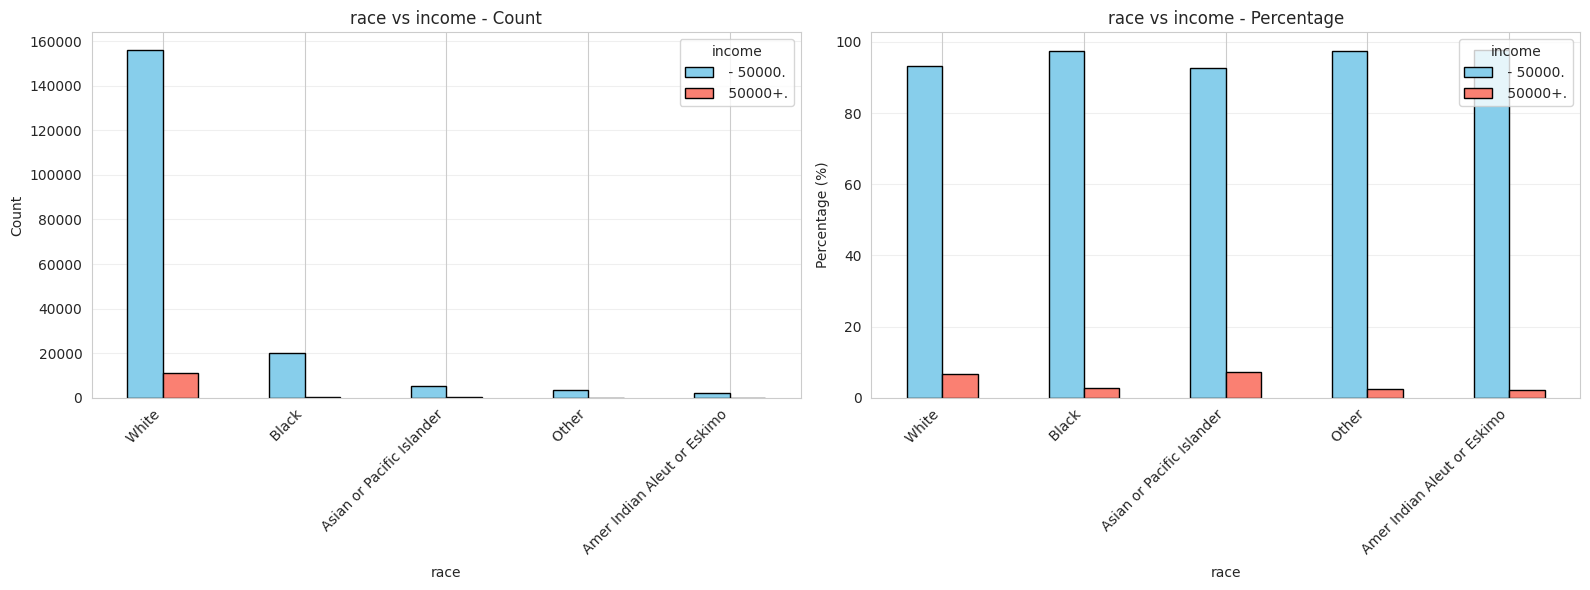


Analyzing class_of_worker vs income...


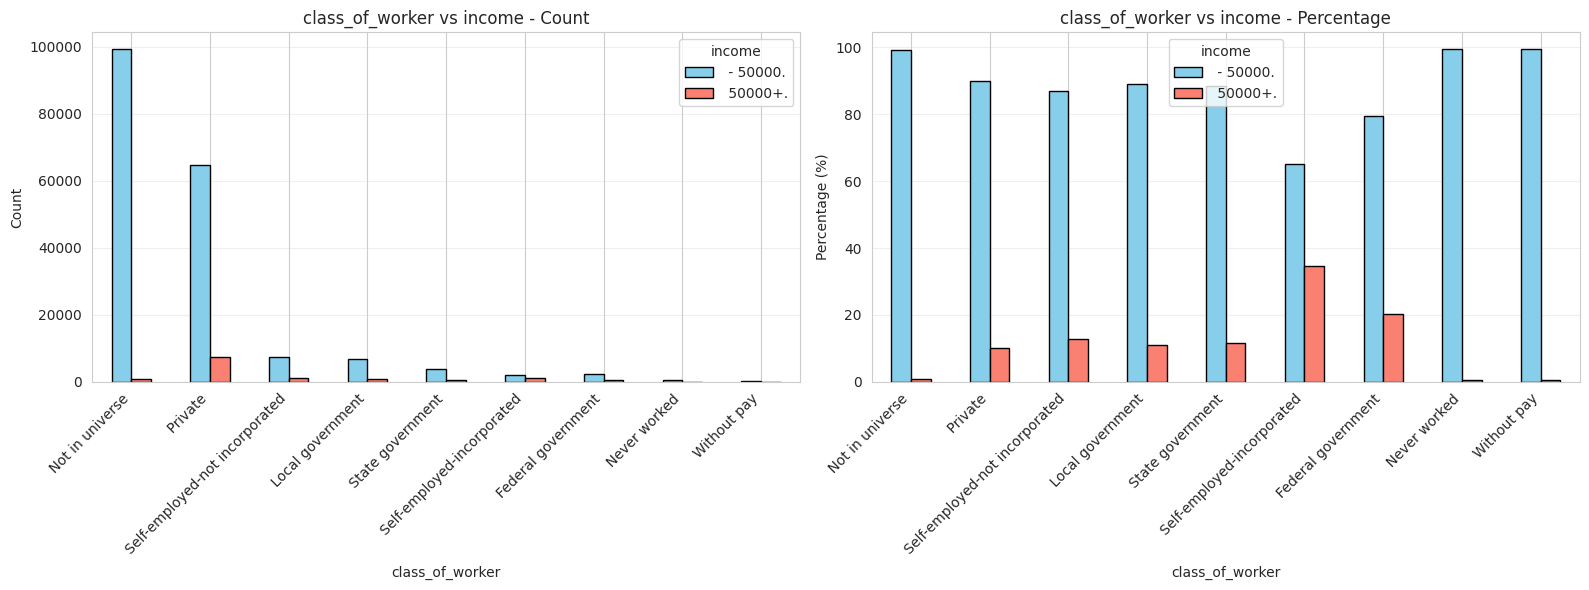


Analyzing major_industry_code vs income...


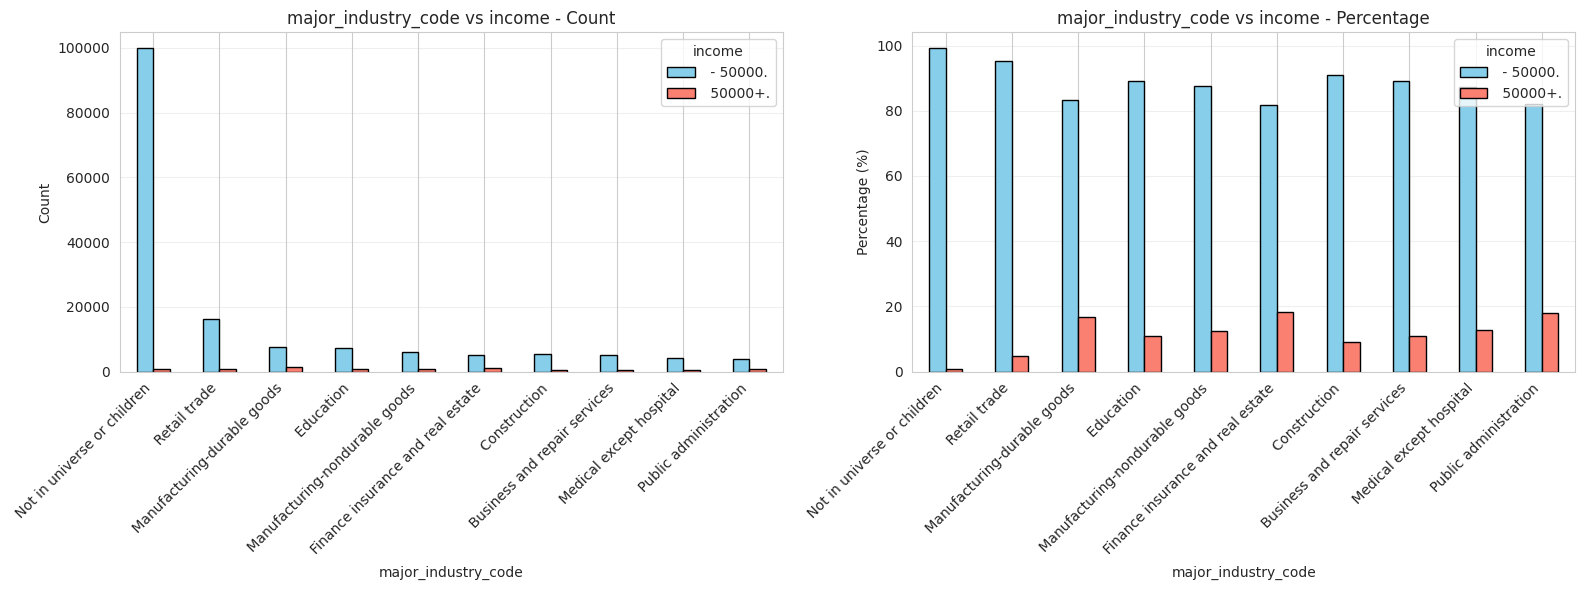


Analyzing major_occupation_code vs income...


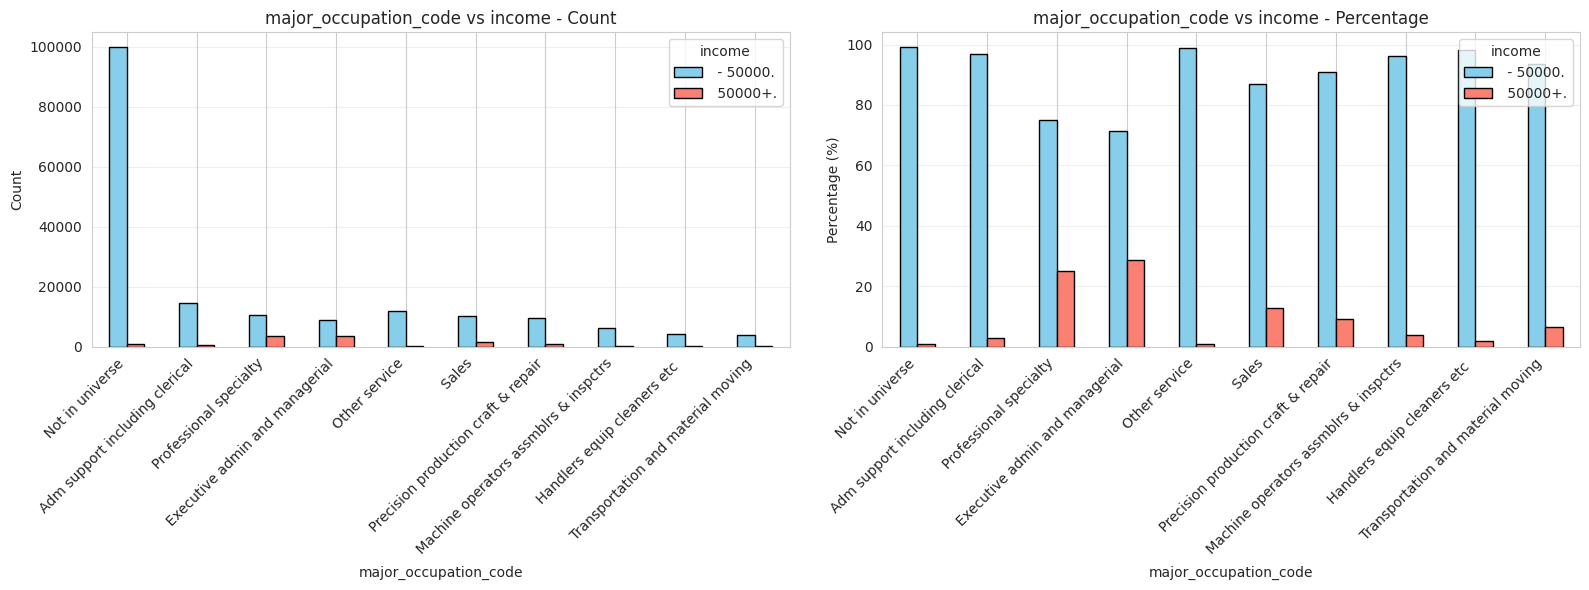

In [11]:
# Plot categorical features vs target
print("=" * 80)
print("CATEGORICAL FEATURES vs TARGET")
print("=" * 80)

# Analyze key categorical features with target
for feature in key_categorical: 
    if feature in train_df.columns and feature != target_col:
        print(f"\nAnalyzing {feature} vs {target_col}...")
        plot_categorical_vs_target(
            train_df,
            feature=feature,
            target=target_col,
            top_n=10,
            save_path=f"../results/figures/{feature}_vs_target.png"
        )


### Takeaways: Categorical Features Analysis
- **Strong Predictors Identified**:
  - **Education**: Higher education levels (Bachelors, Masters, Doctorate) strongly associated with income > $50K
  - **Marital Status**: Married individuals (especially with spouse present) more likely to earn > $50K
  - **Sex**: Gender shows significant difference in income distribution (potential bias to be aware of)
  - **Occupation/Industry**: Professional and managerial roles strongly associated with higher income
- **Feature Engineering**:
  - Education: Can create ordinal encoding or group into "High School or Less", "Some College", "Bachelor's+", "Advanced Degree"
  - Marital Status: May group into "Married", "Never Married", "Previously Married"
  - Occupation/Industry: High cardinality - consider grouping or target encoding
- **Data Quality**:
  - "Not in universe" appears frequently in worker-related features (likely children, students, retirees)
  - Need to handle these special categories appropriately
- **Bias Considerations**: 
  - Gender and race show income disparities - important to document and consider in model interpretation
  - May need to exclude protected attributes depending on use case and regulations


## 8. Correlation Analysis


CORRELATION ANALYSIS


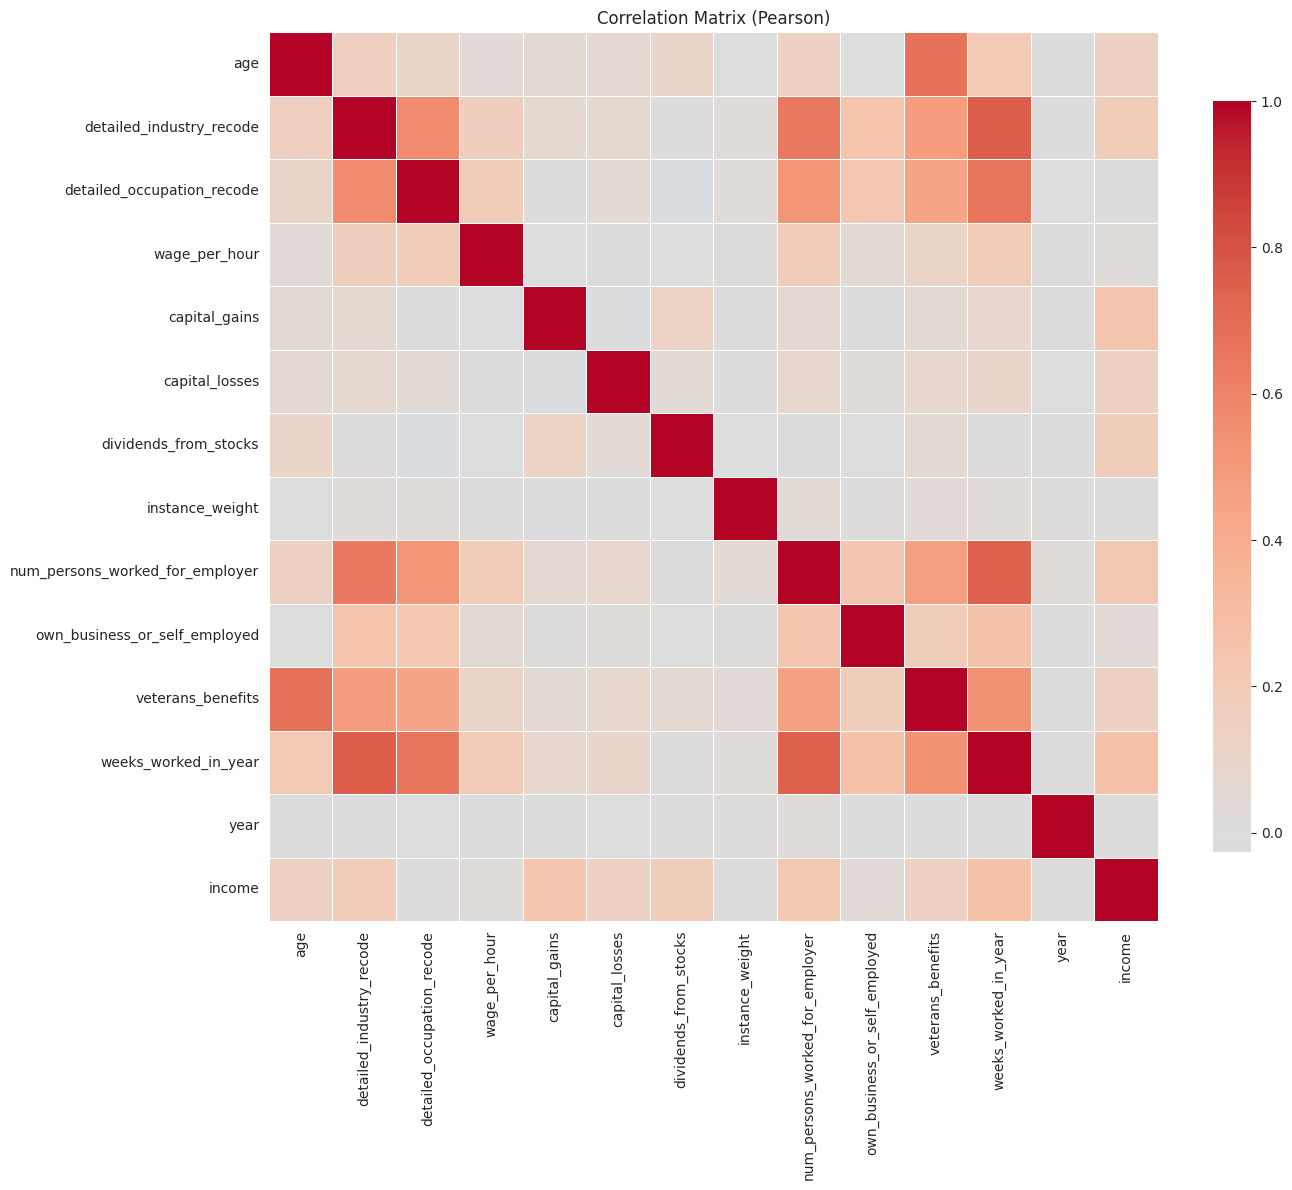

In [12]:
# Correlation matrix for numerical features
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Encode target for correlation
train_df_encoded = train_df.copy()
if train_df[target_col].dtype == 'object':
    train_df_encoded[target_col] = pd.Categorical(train_df[target_col]).codes

# Plot correlation matrix
plot_correlation_matrix(
    train_df_encoded[num_cols_for_stats + [target_col]],
    method='pearson',
    save_path="../results/figures/correlation_matrix.png"
)


FEATURE CORRELATION WITH TARGET


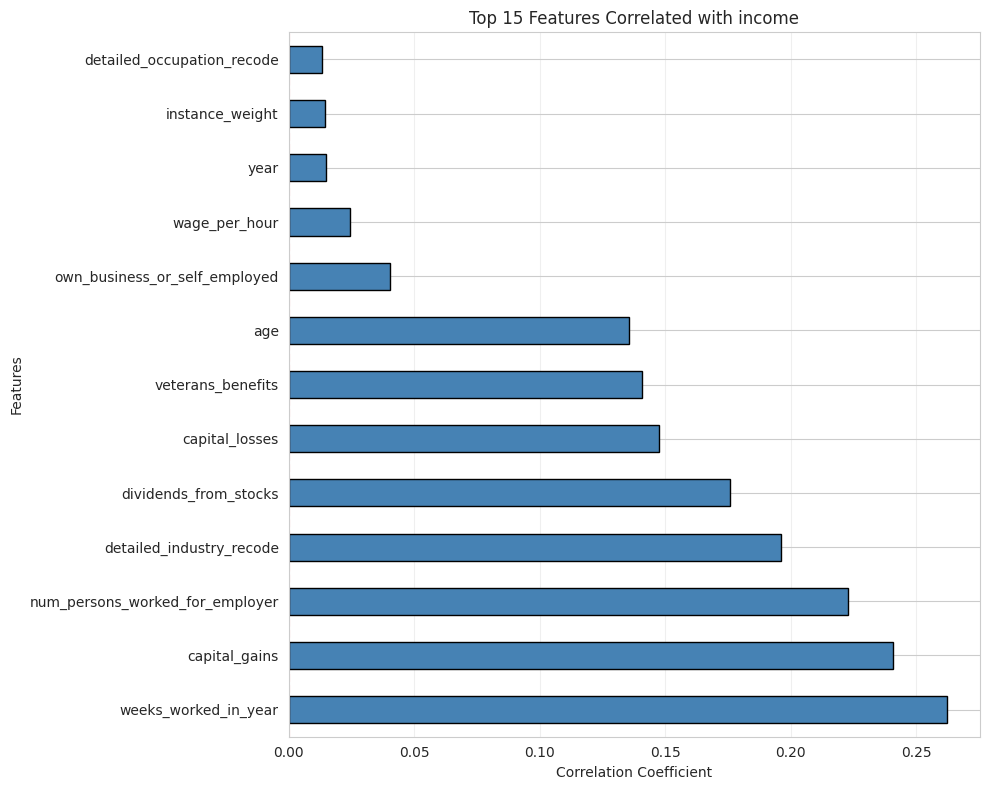

In [13]:
# Feature correlation with target
print("=" * 80)
print("FEATURE CORRELATION WITH TARGET")
print("=" * 80)

plot_feature_correlation_with_target(
    train_df_encoded,
    target=target_col,
    top_n=15,
    save_path="../results/figures/feature_correlation_target.png"
)


### Takeaways: Correlation Analysis
- **Low Multicollinearity**: Most numerical features show low correlation with each other, reducing risk of multicollinearity issues
- **Strong Predictors**:
  - Weeks worked in year: Strong positive correlation with income
  - Age: Moderate positive correlation
  - Financial features (capital gains, dividends): Strong correlation when non-zero
- **Feature Selection**:
  - Can use correlation threshold to identify redundant features
  - Some features may be candidates for removal if they add little information
- **Modeling Implications**:
  - Linear models (Logistic Regression) should work well given low multicollinearity
  - Tree-based models can capture non-linear relationships that correlation doesn't reveal
  - Feature interactions may be valuable (e.g., age × education, weeks_worked × occupation)


## 9. Categorical Feature Importance (Chi-square Analysis)


CATEGORICAL FEATURE IMPORTANCE

Analyzing 27 categorical features...


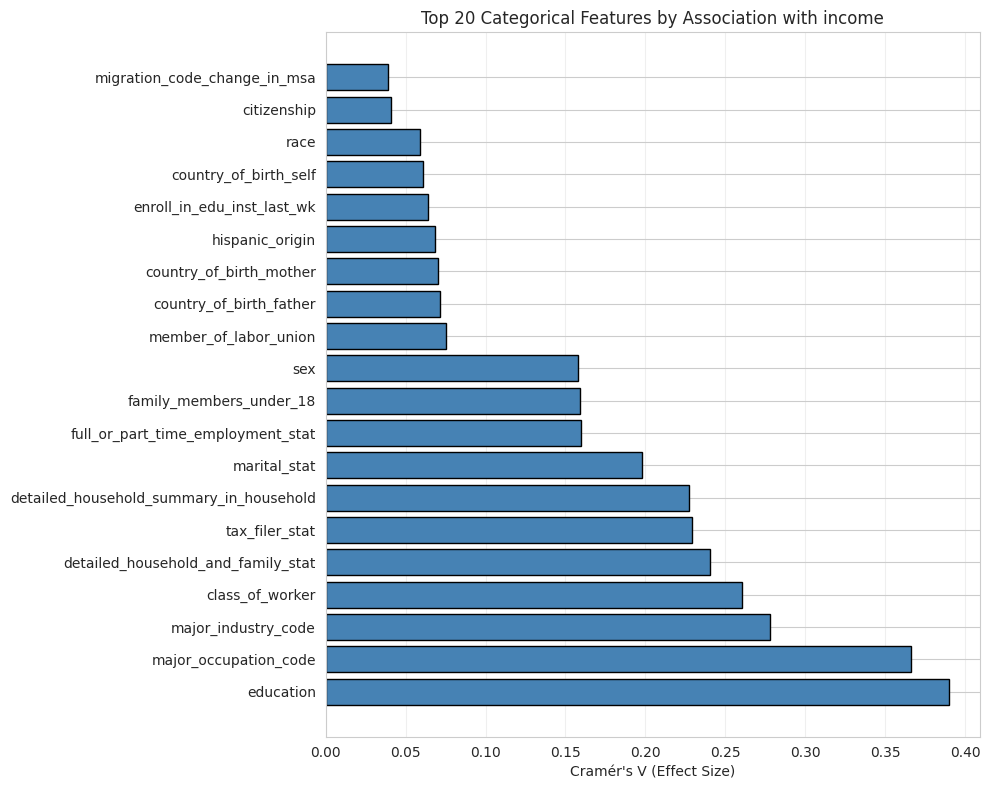


Top categorical features by association with target:


,feature,chi2,p_value,cramers_v
1,education,30322.049718,0.000000e+00,0.389837
5,major_occupation_code,26765.882894,0.000000e+00,0.366264
4,major_industry_code,15404.367654,0.000000e+00,0.277860
0,class_of_worker,13542.953109,0.000000e+00,0.260531
14,detailed_household_and_family_stat,11536.387236,0.000000e+00,0.240458
12,tax_filer_stat,10484.359945,0.000000e+00,0.229232
15,detailed_household_summary_in_household,10301.203726,0.000000e+00,0.227220
3,marital_stat,7794.867355,0.000000e+00,0.197655
11,full_or_part_time_employment_stat,5098.018910,0.000000e+00,0.159847
21,family_members_under_18,5054.768316,0.000000e+00,0.159167


In [14]:
# Calculate categorical feature importance using chi-square
print("=" * 80)
print("CATEGORICAL FEATURE IMPORTANCE")
print("=" * 80)

# Filter categorical columns (exclude target and columns with too many unique values)
categorical_for_analysis = [
    col for col in categorical_cols 
    if col != target_col and train_df[col].nunique() < 50
]

print(f"\nAnalyzing {len(categorical_for_analysis)} categorical features...")

importance_df = plot_feature_importance_by_target(
    train_df,
    categorical_features=categorical_for_analysis,
    target=target_col,
    top_n=20,
    save_path="../results/figures/categorical_feature_importance.png"
)

print("\nTop categorical features by association with target:")
display(importance_df)


### Takeaways: Categorical Feature Importance (Chi-square)
- **Most Important Categorical Features** (by Cramér's V):
  - Education level, occupation, and industry show strongest associations with income
  - Marital status and class of worker are also highly predictive
  - These features should be prioritized in feature engineering
- **Feature Selection**:
  - Features with low Cramér's V (< 0.1) may be candidates for removal
  - High cardinality features with low importance can be grouped or removed
- **Encoding Strategy**:
  - High-importance categorical features: Consider target encoding or leave-one-out encoding
  - Medium-importance: One-hot encoding may be sufficient
  - Low-importance: Can use label encoding to reduce dimensionality
- **Statistical Significance**: Chi-square tests confirm these associations are statistically significant (p < 0.05)


## 10. Outlier Detection


OUTLIER DETECTION


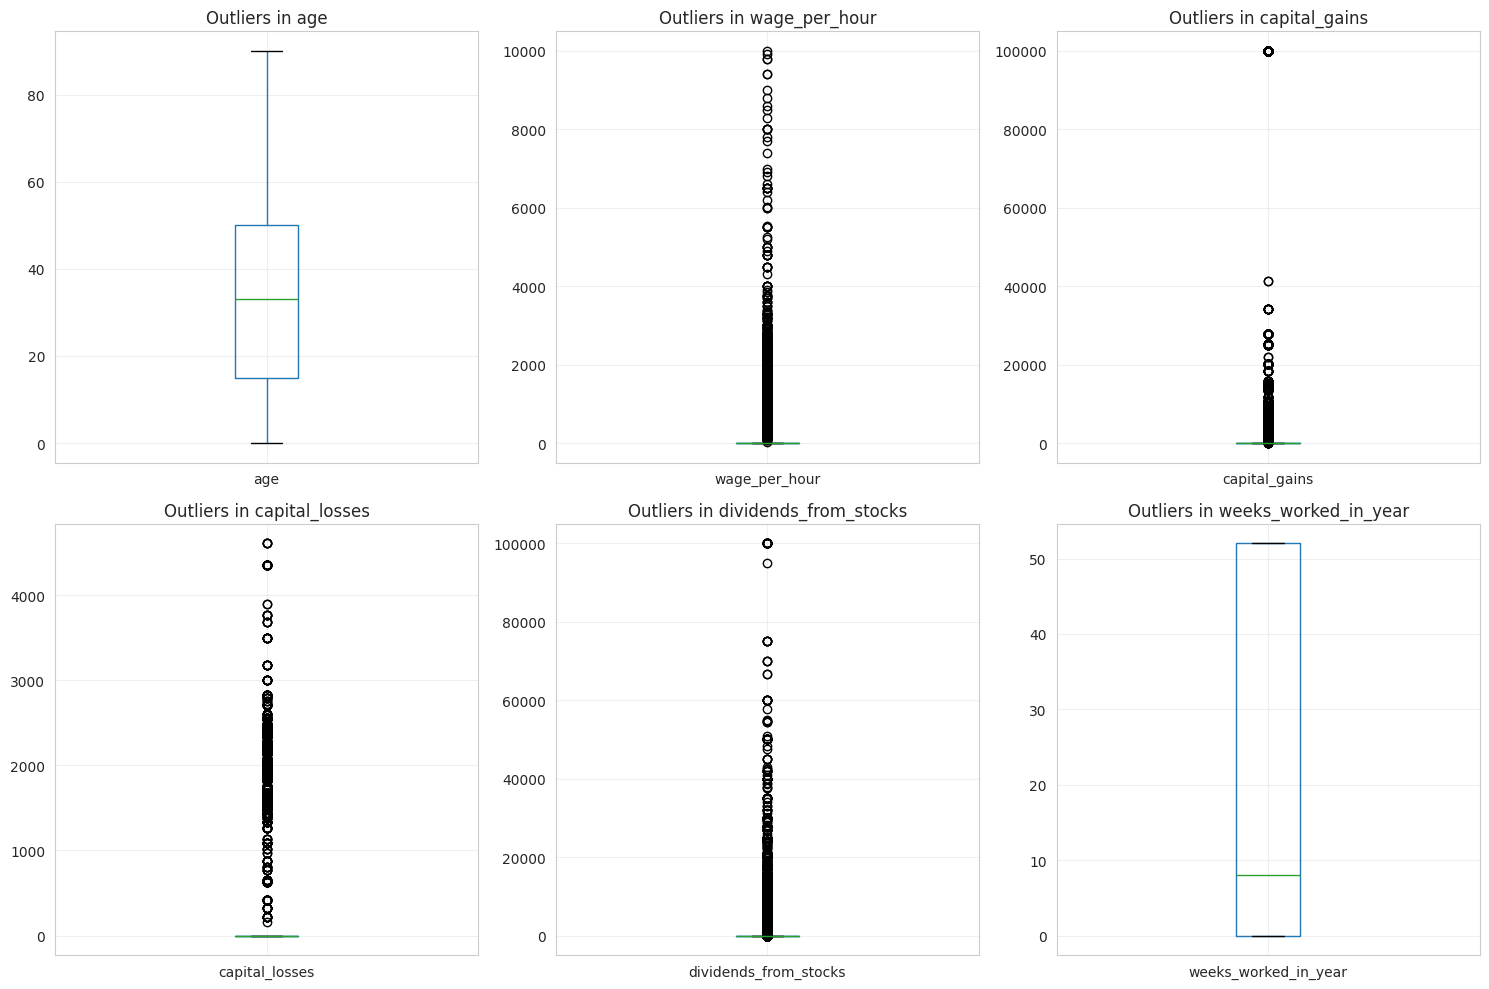

In [15]:
# Detect outliers in numerical features
print("=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Plot box plots for key numerical features
plot_outliers(
    train_df,
    columns=key_numerical,
    method='iqr',
    save_path="../results/figures/outliers.png"
)


### Takeaways: Outlier Detection
- **Outlier Patterns**:
  - Financial features (wage_per_hour, capital_gains, dividends) have extreme outliers
  - Many outliers may be legitimate (high earners) rather than errors
  - Age outliers (very young/old) are likely valid but may need special handling
- **Treatment Strategy**:
  - **Winsorization**: Cap extreme values at 95th/99th percentile for financial features
  - **Log Transformation**: Apply to right-skewed features to normalize distributions
  - **Robust Scaling**: Use RobustScaler instead of StandardScaler to handle outliers
  - **Tree-based Models**: More robust to outliers than linear models
- **Data Quality**:
  - Extreme values in wage_per_hour (9999) likely represent missing/unknown rather than actual wages
  - Consider creating "unknown_wage" flag and setting these to median/mode
- **Model Impact**: Outliers can significantly impact linear models but tree-based models are more robust


## 11. Key Insights and Summary


## 11. Overall Conclusions and Recommendations

### Key Findings Summary

1. **Data Quality**
   - Dataset is large and relatively clean with ~200K training samples
   - Missing values are well-documented (marked as "?") and follow predictable patterns
   - Some data quality issues: extreme outliers in financial features, potential encoding issues

2. **Target Variable**
   - **Severe class imbalance** (6.21% positive class) - primary challenge for modeling
   - Requires specialized techniques: class weights, SMOTE, or ensemble methods
   - Metrics: Focus on ROC-AUC and Precision-Recall rather than accuracy

3. **Feature Insights**
   - **Strong predictors**: Education, occupation, weeks worked, age, marital status
   - **Financial features**: Highly predictive when non-zero, but most values are zero
   - **Categorical features**: High cardinality in some features requires careful encoding strategy

### Recommendations for Next Steps

#### Data Preprocessing
1. **Missing Values**:
   - Replace "?" with NaN for consistent handling
   - Migration features: Create binary flag + impute with "Not in universe"
   - Country features: Impute with mode or "Unknown"

2. **Feature Engineering**:
   - Create binary flags for financial features (has_capital_gains, has_dividends, etc.)
   - Log transform financial features (after handling zeros)
   - Group high-cardinality categorical features (education, occupation)
   - Create interaction features: age × education, weeks_worked × occupation

3. **Outlier Treatment**:
   - Winsorize extreme values in financial features (95th percentile)
   - Handle wage_per_hour = 9999 as missing/unknown
   - Use RobustScaler for numerical features

#### Modeling Strategy
1. **Model Selection**:
   - Start with tree-based models (XGBoost, LightGBM, Random Forest) - handle imbalance well
   - Try Logistic Regression with class weights as baseline
   - Consider ensemble methods

2. **Evaluation Metrics**:
   - Primary: ROC-AUC (handles imbalance well)
   - Secondary: Precision-Recall curve, F1-score
   - Monitor: Precision (important for business use case)

3. **Class Balancing**:
   - Use class_weight='balanced' in models
   - Try SMOTE for oversampling
   - Consider cost-sensitive learning

#### Feature Selection
- Prioritize features with high Cramér's V (categorical) and correlation (numerical)
- Consider removing low-importance features to reduce dimensionality
- Use feature importance from tree models to guide selection

### Potential Challenges
1. **Class Imbalance**: Will require careful handling throughout pipeline
2. **High Dimensionality**: 40 features may lead to overfitting - feature selection important
3. **Bias Considerations**: Gender and race show income disparities - document and consider ethical implications
4. **Data Quality**: Extreme outliers and special values need careful treatment

### Success Criteria
- ROC-AUC > 0.85 (baseline: 0.50 for random, 0.94 for majority class)
- Precision > 0.70 for high-income predictions
- Model interpretability for business stakeholders
- Fairness considerations addressed


## 12. Overall Conclusions and Recommendations

### Key Findings Summary

1. **Data Quality**
   - Dataset is large and relatively clean with ~200K training samples
   - Missing values are well-documented (marked as "?") and follow predictable patterns
   - Some data quality issues: extreme outliers in financial features, potential encoding issues

2. **Target Variable**
   - **Severe class imbalance** (6.21% positive class) - primary challenge for modeling
   - Requires specialized techniques: class weights, SMOTE, or ensemble methods
   - Metrics: Focus on ROC-AUC and Precision-Recall rather than accuracy

3. **Feature Insights**
   - **Strong predictors**: Education, occupation, weeks worked, age, marital status
   - **Financial features**: Highly predictive when non-zero, but most values are zero
   - **Categorical features**: High cardinality in some features requires careful encoding strategy

### Next Steps

#### Data Preprocessing
1. **Missing Values**:
   - Replace "?" with NaN for consistent handling
   - Migration features: Create binary flag + impute with "Not in universe"
   - Country features: Impute with mode or "Unknown"

2. **Feature Engineering**:
   - Create binary flags for financial features (has_capital_gains, has_dividends, etc.)
   - Log transform financial features (after handling zeros)
   - Group high-cardinality categorical features (education, occupation)
   - Create interaction features: age × education, weeks_worked × occupation

3. **Outlier Treatment**:
   - Winsorize extreme values in financial features (95th percentile)
   - Handle wage_per_hour = 9999 as missing/unknown
   - Use RobustScaler for numerical features

#### Modeling Strategy
1. **Model Selection**:
   - Start with tree-based models (XGBoost, LightGBM, Random Forest) - handle imbalance well
   - Try Logistic Regression with class weights as baseline
   - Consider ensemble methods

2. **Evaluation Metrics**:
   - Primary: ROC-AUC (handles imbalance well)
   - Secondary: Precision-Recall curve, F1-score
   - Monitor: Precision (important for business use case)

3. **Class Balancing**:
   - Use class_weight='balanced' in models
   - Try SMOTE for oversampling
   - Consider cost-sensitive learning

#### Feature Selection
- Prioritize features with high Cramér's V (categorical) and correlation (numerical)
- Consider removing low-importance features to reduce dimensionality
- Use feature importance from tree models to guide selection

### Potential Challenges
1. **Class Imbalance**: Will require careful handling throughout pipeline
2. **High Dimensionality**: 40 features may lead to overfitting - feature selection important
3. **Bias Considerations**: Gender and race show income disparities - document and consider ethical implications
4. **Data Quality**: Extreme outliers and special values need careful treatment

### Success Criteria
- ROC-AUC > 0.85 (baseline: 0.50 for random, 0.94 for majority class)
- Precision > 0.70 for high-income predictions
- Model interpretability for business stakeholders
- Fairness considerations addressed


## 11. Overall Conclusions and Recommendations

### Key Findings Summary

1. **Data Quality**
   - Dataset is large and relatively clean with ~200K training samples
   - Missing values are well-documented (marked as "?") and follow predictable patterns
   - Some data quality issues: extreme outliers in financial features, potential encoding issues

2. **Target Variable**
   - **Severe class imbalance** (6.21% positive class) - primary challenge for modeling
   - Requires specialized techniques: class weights, SMOTE, or ensemble methods
   - Metrics: Focus on ROC-AUC and Precision-Recall rather than accuracy

3. **Feature Insights**
   - **Strong predictors**: Education, occupation, weeks worked, age, marital status
   - **Financial features**: Highly predictive when non-zero, but most values are zero
   - **Categorical features**: High cardinality in some features requires careful encoding strategy

### Recommendations for Next Steps

#### Data Preprocessing
1. **Missing Values**:
   - Replace "?" with NaN for consistent handling
   - Migration features: Create binary flag + impute with "Not in universe"
   - Country features: Impute with mode or "Unknown"

2. **Feature Engineering**:
   - Create binary flags for financial features (has_capital_gains, has_dividends, etc.)
   - Log transform financial features (after handling zeros)
   - Group high-cardinality categorical features (education, occupation)
   - Create interaction features: age × education, weeks_worked × occupation

3. **Outlier Treatment**:
   - Winsorize extreme values in financial features (95th percentile)
   - Handle wage_per_hour = 9999 as missing/unknown
   - Use RobustScaler for numerical features

#### Modeling Strategy
1. **Model Selection**:
   - Start with tree-based models (XGBoost, LightGBM, Random Forest) - handle imbalance well
   - Try Logistic Regression with class weights as baseline
   - Consider ensemble methods

2. **Evaluation Metrics**:
   - Primary: ROC-AUC (handles imbalance well)
   - Secondary: Precision-Recall curve, F1-score
   - Monitor: Precision (important for business use case)

3. **Class Balancing**:
   - Use class_weight='balanced' in models
   - Try SMOTE for oversampling
   - Consider cost-sensitive learning

#### Feature Selection
- Prioritize features with high Cramér's V (categorical) and correlation (numerical)
- Consider removing low-importance features to reduce dimensionality
- Use feature importance from tree models to guide selection

### Potential Challenges
1. **Class Imbalance**: Will require careful handling throughout pipeline
2. **High Dimensionality**: 40 features may lead to overfitting - feature selection important
3. **Bias Considerations**: Gender and race show income disparities - document and consider ethical implications
4. **Data Quality**: Extreme outliers and special values need careful treatment

### Success Criteria
- ROC-AUC > 0.85 (baseline: 0.50 for random, 0.94 for majority class)
- Precision > 0.70 for high-income predictions
- Model interpretability for business stakeholders
- Fairness considerations addressed


In [16]:
# Summary of key findings
print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(train_df):,}")
print(f"   - Total features: {len(columns) - 1}")
print(f"   - Numerical features: {len(numerical_cols)}")
print(f"   - Categorical features: {len(categorical_cols)}")

print("\n2. TARGET VARIABLE:")
target_dist = train_df[target_col].value_counts(normalize=True) * 100
for value, pct in target_dist.items():
    print(f"   - {value}: {pct:.2f}%")
print(f"   - Class imbalance ratio: {imbalance_ratio:.4f}")

print("\n3. MISSING VALUES:")
if len(missing_cols) > 0:
    print(f"   - Columns with missing values: {len(missing_cols)}")
    print(f"   - Top 5 columns with most missing values:")
    for idx, row in missing_cols.head(5).iterrows():
        print(f"     * {row['column']}: {row['missing_percentage']:.2f}%")
else:
    print("   - No missing values detected")

print("\n4. KEY NUMERICAL FEATURES:")
for col in key_numerical[:5]:
    if col in train_df.columns:
        print(f"   - {col}:")
        print(f"     Mean: {train_df[col].mean():.2f}, Median: {train_df[col].median():.2f}")
        print(f"     Min: {train_df[col].min():.2f}, Max: {train_df[col].max():.2f}")

print("\n5. KEY CATEGORICAL FEATURES:")
for col in key_categorical[:5]:
    if col in train_df.columns:
        top_value = train_df[col].value_counts().index[0]
        top_pct = (train_df[col].value_counts().iloc[0] / len(train_df)) * 100
        print(f"   - {col}:")
        print(f"     Unique values: {train_df[col].nunique()}")
        print(f"     Most common: {top_value} ({top_pct:.2f}%)")

print("\n" + "=" * 80)
print("EDA COMPLETE!")
print("=" * 80)
print("\nAll visualizations saved to: ../results/figures/")


KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Total samples: 199,523
   - Total features: 41
   - Numerical features: 13
   - Categorical features: 29

2. TARGET VARIABLE:
   -  - 50000.: 93.79%
   -  50000+.: 6.21%
   - Class imbalance ratio: 0.0662

3. MISSING VALUES:
   - Columns with missing values: 8
   - Top 5 columns with most missing values:
     * migration_prev_res_in_sunbelt: 49.97%
     * migration_code_change_in_msa: 49.97%
     * migration_code_change_in_reg: 49.97%
     * migration_code_move_within_reg: 49.97%
     * country_of_birth_father: 3.36%

4. KEY NUMERICAL FEATURES:
   - age:
     Mean: 34.49, Median: 33.00
     Min: 0.00, Max: 90.00
   - wage_per_hour:
     Mean: 55.43, Median: 0.00
     Min: 0.00, Max: 9999.00
   - capital_gains:
     Mean: 434.72, Median: 0.00
     Min: 0.00, Max: 99999.00
   - capital_losses:
     Mean: 37.31, Median: 0.00
     Min: 0.00, Max: 4608.00
   - dividends_from_stocks:
     Mean: 197.53, Median: 0.00
     Min: 0.00, Max: 99999.00